<a href="https://colab.research.google.com/github/Muhammad-Hozefa-Haider/TSP_DS_Tasks/blob/main/TSF_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation
**Data Science & Business Analytics Tasks**

Author Name: Muhammad Hozefa Haider

**Task 4:** Exploratory Data Analysis - Terrorism (Level - Intermediate)

For this task, we will be performing ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’. Then, we will try to derive all security issues and insights using EDA. And as a security analyst, we will try to find out the hot zone of terrorism.


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
print('done!')

done!


##Importing Data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/globalterrorism.csv',encoding = "ISO-8859-1")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Inspecting Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [13]:
df.count()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [10]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

## Cleaning Data

In [14]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

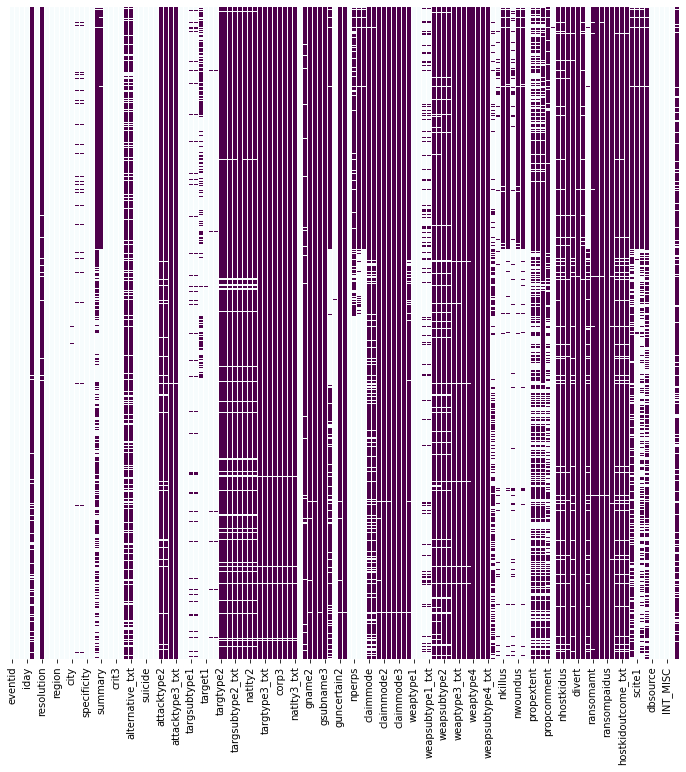

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='BuPu')

In [17]:
df.dropna(thresh=180000,axis=1,inplace=True)

## Relationship between variables

In [20]:
df.shape

(181691, 39)

In [21]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,guncertain1,individual,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.030641,0.070646,0.002019,0.026215,-0.016789,0.298888,0.093720,-0.082972,0.137743,0.074173,0.079080,-0.019084,0.040647,0.017939,-0.011716,-0.278927,-0.010146,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.093736,-0.082963,0.137736,0.074153,0.079082,-0.019068,0.040656,0.017944,-0.011737,-0.278916,-0.010159,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.004422,-0.002845,0.003071,0.006705,-0.000948,-0.004838,-0.004460,-0.001661,0.007863,-0.005816,0.003397,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.000395,-0.011802,0.003593,-0.005333,-0.000052,0.003845,-0.002186,-0.003788,-0.003019,-0.003903,0.004077,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,-0.013440,0.073233,-0.033961,0.272272,0.011613,0.013609,0.033464,-0.008929,0.207802,-0.002096,0.326351,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,-0.084599,-0.012291,-0.006646,-0.038480,-0.040288,0.038304,-0.022218,-0.037827,-0.050360,-0.021384,-0.019703,0.600020,-0.010369,0.027918,-0.023708,0.032051,-0.013335,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,-0.084198,0.073678,0.025521,-0.013163,-0.010175,0.086832,0.011963,-0.030909,0.112672,0.007642,0.041396,0.149821,-0.022758,-0.059963,0.013257,-0.183279,-0.023058,-0.082584,-0.071917,0.043139,-0.047900
specificity,0.030641,0.030626,0.003621,-0.006991,0.057897,-0.084599,-0.084198,1.000000,-0.049855,0.014323,0.000943,-0.072680,0.041980,0.036660,0.015301,-0.031921,0.056041,0.044518,-0.034336,-0.009168,-0.022631,0.064587,0.028111,0.016048,0.073022,0.071333,-0.019197,0.061389
vicinity,0.070646,0.070659,-0.004501,-0.005367,0.017784,-0.012291,0.073678,-0.049855,1.000000,0.003330,-0.000534,-0.054995,0.034820,-0.011645,-0.002223,0.008352,0.006504,0.024644,0.012976,0.031177,-0.011986,0.001496,-0.019811,0.004626,0.014487,0.015119,-0.008232,0.010325
crit1,0.002019,0.001995,0.001568,0.011434,-0.015029,-0.006646,0.025521,0.014323,0.003330,1.000000,-0.008984,-0.040589,-0.059065,0.030311,-0.010733,0.019039,0.027544,-0.040026,-0.009719,0.013568,-0.025591,0.029257,-0.007595,-0.015465,0.089973,0.089888,0.015692,0.082288


## Visualising Data

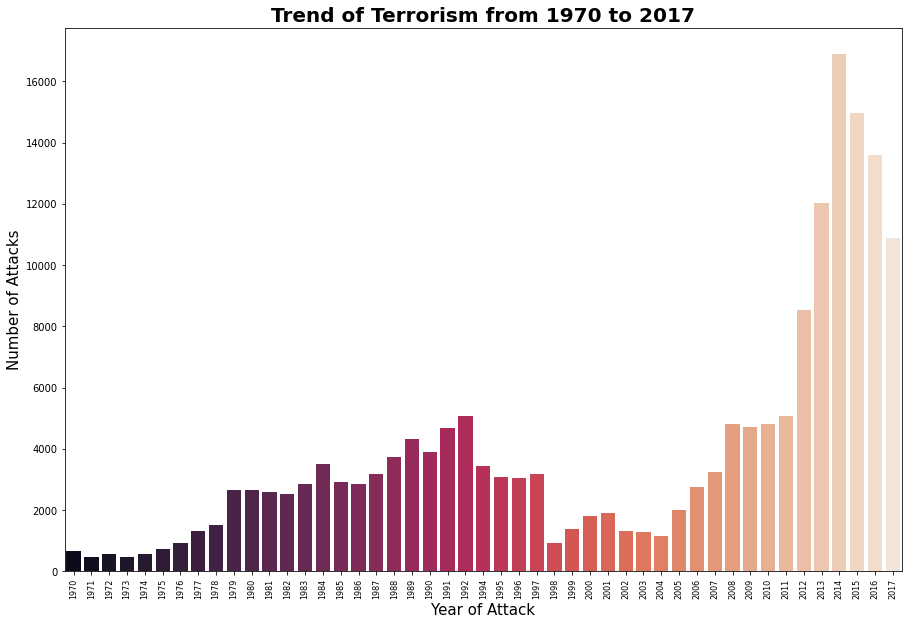

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['iyear'], palette='rocket')

plt.xlabel('Year of Attack',size=15)
plt.xticks(rotation=90 , size=8)
plt.ylabel('Number of Attacks',size=15)
plt.title('Trend of Terrorism from 1970 to 2017', size=20, fontweight='bold')

plt.show()

From the graph, we can observe that the most number of attacks happened in 2014 as the terrorist activities increased by a third than previous year according to BBC.

**Trend of Attacks with respect to Regions**

In [35]:
df['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

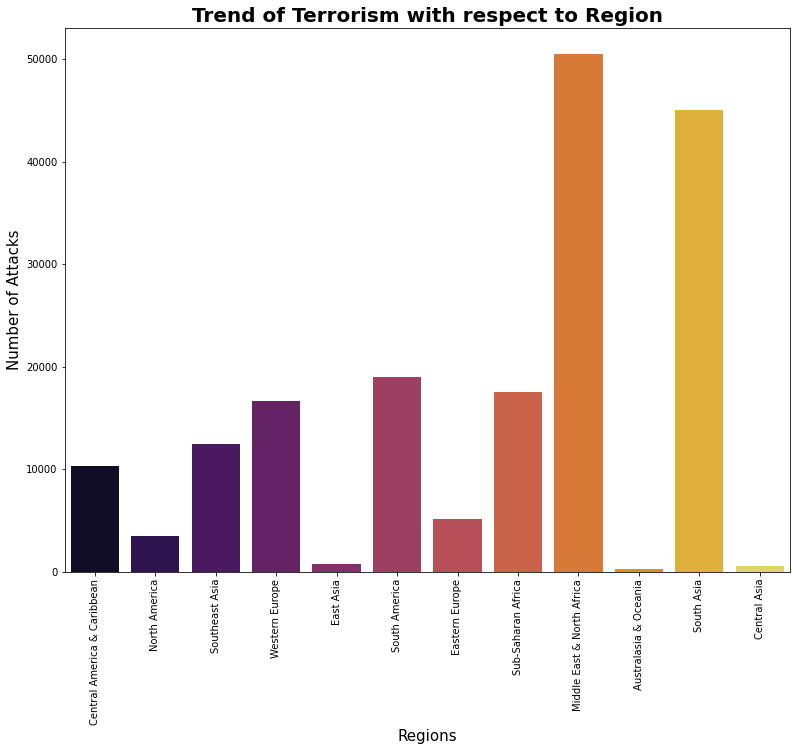

In [59]:
plt.figure(figsize=(13,10))
sns.countplot(x=df['region_txt'], palette='inferno')

plt.xlabel('Regions',size=15)
plt.xticks(size=10,rotation=90)
plt.ylabel('Number of Attacks',size=15)
plt.title('Trend of Terrorism with respect to Region', size=20, fontweight='bold')

plt.show()

As we can see from the above graph, **Middle East & North Africa** have most number of terrorist attacks hence the hot zone of terrorism. On the other hand, **Central Asia** and **East Asia** have least number of attacks.

**Trend of Attacks with respect to Countries**

In [47]:
df['country_txt'].value_counts()[:30]

Iraq                        24636
Pakistan                    14368
Afghanistan                 12731
India                       11960
Colombia                     8306
Philippines                  6908
Peru                         6096
El Salvador                  5320
United Kingdom               5235
Turkey                       4292
Somalia                      4142
Nigeria                      3907
Thailand                     3849
Yemen                        3347
Spain                        3249
Sri Lanka                    3022
United States                2836
Algeria                      2743
France                       2693
Egypt                        2479
Lebanon                      2478
Chile                        2365
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Russia                       2194
Israel                       2183
Guatemala                    2050
South Africa                 2016
Nicaragua     

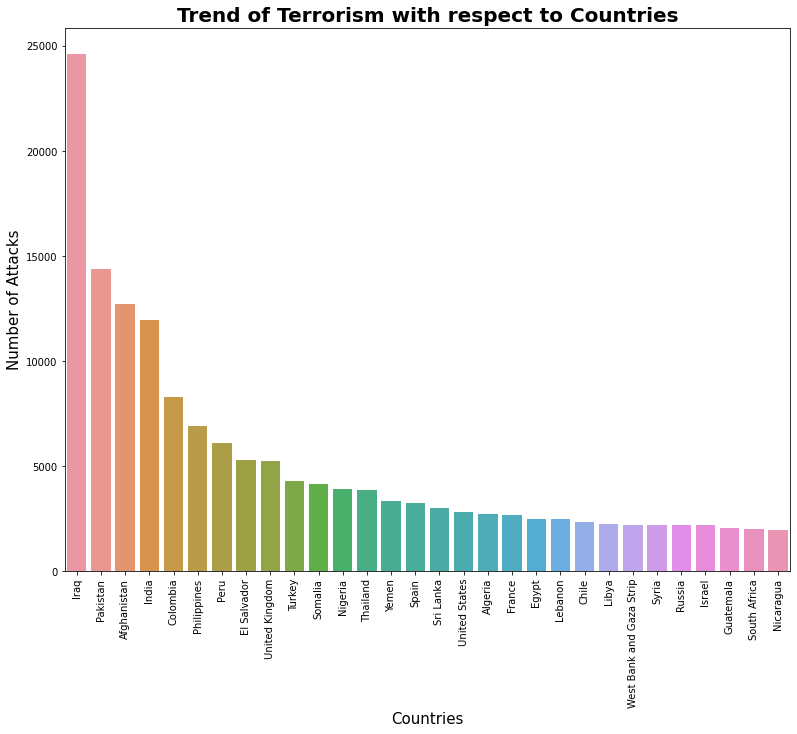

In [60]:
plt.figure(figsize=(13,10))
sns.barplot(x=df['country_txt'].value_counts()[:30].index,y=df['country_txt'].value_counts()[:30].values)

plt.xlabel('Countries',size=15)
plt.xticks(size=10,rotation=90)
plt.ylabel('Number of Attacks',size=15)
plt.title('Trend of Terrorism with respect to Countries', size=20, fontweight='bold')

plt.show()

From the above bar graph, we can observe that **Iraq** is the hotzone of terrorism with highest number of terrorist attacks followed by **Pakistan** and **Afghanistan**.

**Trend of Attacks with respect to Terrorist Groups**

In [57]:
df['gname'].value_counts()[:30]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

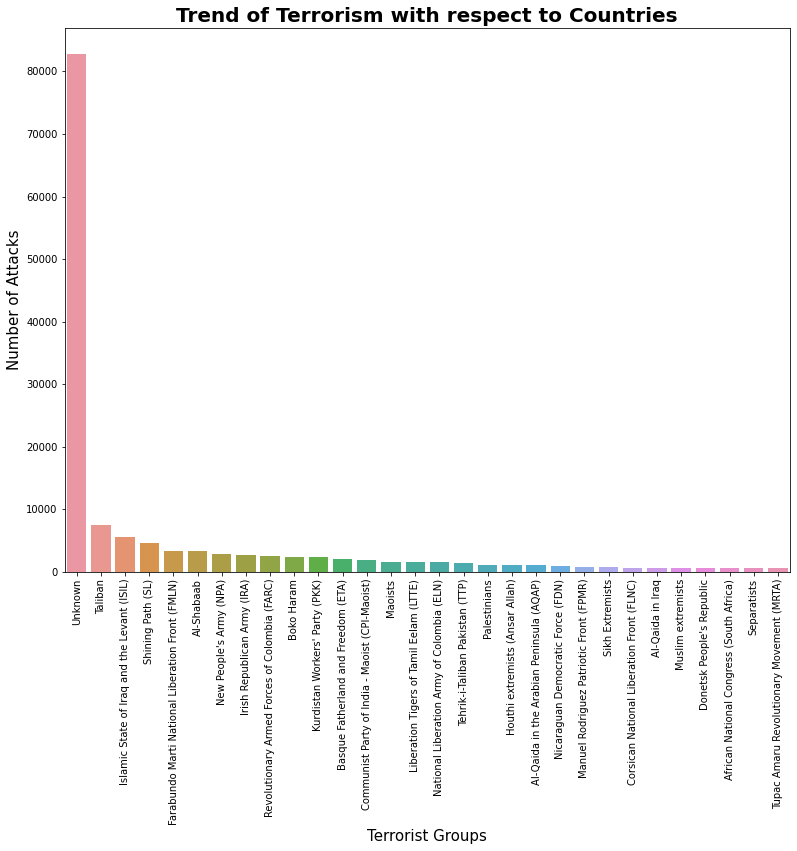

In [61]:
plt.figure(figsize=(13,10))
sns.barplot(x=df['gname'].value_counts()[:30].index,y=df['gname'].value_counts()[:30].values)

plt.xlabel('Terrorist Groups',size=15)
plt.xticks(size=10,rotation=90)
plt.ylabel('Number of Attacks',size=15)
plt.title('Trend of Terrorism with respect to Countries', size=20, fontweight='bold')

plt.show()

From the above bar graph, we can deduce that a huge number terrorist attacks are done by **unknowns** or none of the organizations took responisibility of it. While on the other hand, **Taliban** seconds the list with around 7000 attacks followed by Islamic State of Iraq and the Levant(ISIL) and Shining path(SL).

**Trend in Type of Attacks**

In [62]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

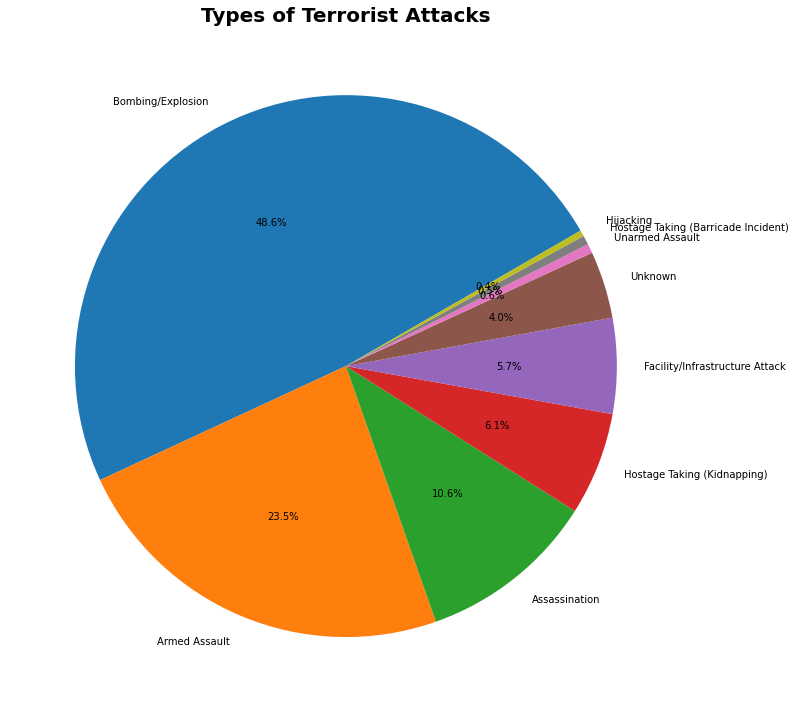

In [97]:
label = df['attacktype1_txt'].value_counts().index
values = df['attacktype1_txt'].value_counts()

fig, ax = plt.subplots(figsize=(13, 10))
plt.pie(values,labels=label, startangle=30, autopct='%.1f%%')
plt.title('Types of Terrorist Attacks', fontweight='bold',size=20)
plt.tight_layout()

plt.show()


From the above pie chart, we can deduce that the **Bombing/Explosion** is the most committed terrorist attack, followed by **Armed Assault** and **Assassination**.

**Trends in Target of Attacks**

In [98]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

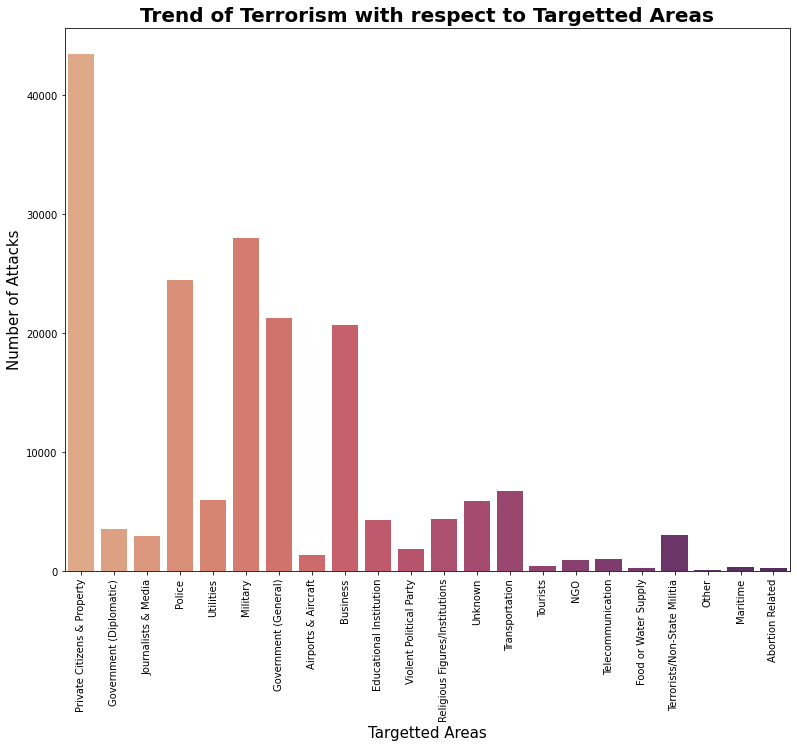

In [108]:
plt.figure(figsize=(13,10))
sns.countplot(x=df['targtype1_txt'], palette='flare')

plt.xlabel('Targetted Areas',size=15)
plt.xticks(size=10,rotation=90)
plt.ylabel('Number of Attacks',size=15)
plt.title('Trend of Terrorism with respect to Targetted Areas', size=20, fontweight='bold')

plt.show()

The above counterplot suggests that the **Private Citizens & Property** sector is mostly hit in a terrorist attack. After that, we have **Military**, **Police** and **Government** sectors as target of Terrorism

## Conclusion

From the above Exploratory Data Analysis, we can deduce the following useful insights and security issues:


*   The number of terrorist attacks peaked in 2014 around the world.
*   Most number of terrorist attacks took place in Middle East & North Africa while least number of attacks in Central and East Asia.
*   Huge number of terrorist attacks are done by unknown groups while Taliban Terrorist Organization seconds the list.
*   48.6% of terrorist attacks are Bombing/Explosions.
*   In a terrorist attacks, the private citizens and properties are mostly targeted for a a greater social impact.

Other than this, we observed that Iraq is the hot zone for terrorism among all the countries in the world. While Pakistan and Afghanistan are second and third in the list. This shows that the countries and regions being targeted for spreading terrorism are the ones most effected and damaged by terrorist attacks.
